In [40]:
%matplotlib inline
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import os
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential,Model
import tensorflow.keras as keras
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [41]:
train=pd.read_csv('./input//train.csv')
test=pd.read_csv('./input/test.csv')

# 下調べ 前処理

In [42]:
train.shape

(60000, 785)

In [43]:
test.shape

(5000, 785)

In [44]:
test

,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,4996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,4997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,4998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
import matplotlib.pyplot as plt

In [46]:
test=test.drop('id',axis=1)

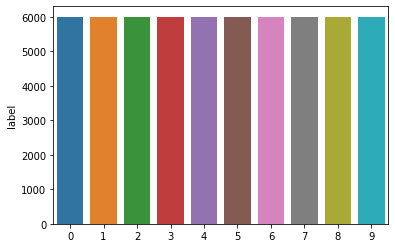

In [47]:
y=train.label.value_counts()
sns.barplot(y.index,y)

In [48]:
X_train=train.drop('label',axis=1)

In [49]:
y_train=train['label']

# スケーリング

In [50]:
X_train=X_train/255
test=test/255

In [51]:
X_train=X_train.values.reshape(-1,28,28,1)
test=test.values.reshape(-1,28,28,1)

In [52]:
print(X_train.shape)
print(test.shape)

(60000, 28, 28, 1)
(5000, 28, 28, 1)


# to_categorical
onehot-encodingのkerasバージョンみたいなもの


In [53]:
y_train=to_categorical(y_train)

In [54]:
y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [55]:
X_train,

(array([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]],
 
 
        [[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
      

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,
random_state=42,test_size=0.3)


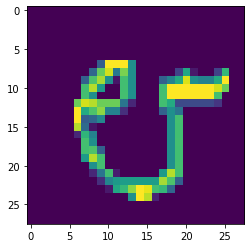

In [57]:
plt.imshow(X_train[0][:,:,0])

In [58]:
datagen=ImageDataGenerator(
    width_shift_range=0.4,
    height_shift_range=0.4,
    rotation_range=30
)

In [59]:
model=Sequential()

model.add(Conv2D(16, kernel_size=(5, 5), activation='relu',
                 kernel_initializer='he_normal', input_shape=(28, 28, 1)))  # 28x28x1 -> 24x24x16
model.add(MaxPooling2D(pool_size=(2, 2)))  # 24x24x16 -> 12x12x16
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu',
                 kernel_initializer='he_normal'))  # 12x12x16 -> 8x8x64
model.add(MaxPooling2D(pool_size=(2, 2)))  # 8x8x64 -> 4x4x64

model.add(Flatten())  # 4x4x64-> 1024
model.add(Dense(10, activation='softmax'))  # 1024 -> 10

model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer='adam',
    metrics=['accuracy']
)

In [60]:
early_stopping=EarlyStopping(patience=5,verbose=1)


In [61]:
model.fit(X_train,y_train,batch_size=1000,verbose=2,epochs=10,validation_data=(X_test,y_test),callbacks=[early_stopping])


Train on 42000 samples, validate on 18000 samples
Epoch 1/10
 - 41s - loss: 0.6816 - acc: 0.8217 - val_loss: 0.1758 - val_acc: 0.9476
Epoch 2/10
 - 40s - loss: 0.1367 - acc: 0.9615 - val_loss: 0.1085 - val_acc: 0.9691
Epoch 3/10
 - 37s - loss: 0.0914 - acc: 0.9753 - val_loss: 0.0802 - val_acc: 0.9767
Epoch 4/10
 - 37s - loss: 0.0691 - acc: 0.9812 - val_loss: 0.0634 - val_acc: 0.9822
Epoch 5/10
 - 52s - loss: 0.0549 - acc: 0.9848 - val_loss: 0.0530 - val_acc: 0.9855
Epoch 6/10
 - 54s - loss: 0.0461 - acc: 0.9871 - val_loss: 0.0486 - val_acc: 0.9861
Epoch 7/10
 - 77s - loss: 0.0387 - acc: 0.9894 - val_loss: 0.0402 - val_acc: 0.9891
Epoch 8/10
 - 81s - loss: 0.0341 - acc: 0.9907 - val_loss: 0.0379 - val_acc: 0.9892
Epoch 9/10
 - 95s - loss: 0.0304 - acc: 0.9918 - val_loss: 0.0360 - val_acc: 0.9899
Epoch 10/10
 - 132s - loss: 0.0283 - acc: 0.9921 - val_loss: 0.0339 - val_acc: 0.9902


In [62]:
y_pre=model.predict(test)

In [63]:
y_pre=np.argmax(y_pre,axis=1)

In [64]:
y_pre

array([3, 0, 2, ..., 1, 6, 3], dtype=int64)

In [65]:
sample_sub=pd.read_csv('./input/sample_submission.csv')

In [66]:
sample_sub

,id,label
0,0,5
1,1,5
2,2,5
3,3,5
4,4,5
...,...,...
4995,4995,5
4996,4996,5
4997,4997,5
4998,4998,5


In [67]:
sample_sub['label']=y_pre

In [68]:
sample_sub

,id,label
0,0,3
1,1,0
2,2,2
3,3,6
4,4,7
...,...,...
4995,4995,1
4996,4996,1
4997,4997,1
4998,4998,6


In [69]:
sample_sub.to_csv('submission.csv',index=False)

In [70]:
pd.read_csv('submission.csv')

,id,label
0,0,3
1,1,0
2,2,2
3,3,6
4,4,7
...,...,...
4995,4995,1
4996,4996,1
4997,4997,1
4998,4998,6
